The confusion matrix is [[0, 2], [2, 3]]
'Recall'/'TPR' is  0.6
Precision is 0.6
False Positive Rate is 1.0
F1_score is 0.6
the AUC is: 0.6


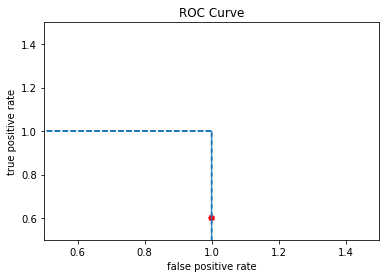

In [88]:
import matplotlib.pyplot as plt
import color as color
def cm(actual, predicted, normalize = False):
   
    unique = sorted(set(actual))
    matrix = [[0 for _ in unique] for _ in unique]
    imap   = {key: i for i, key in enumerate(unique)}
   
   
    for p, a in zip(predicted, actual):
        matrix[imap[p]][imap[a]] += 1
    if normalize:
        sigma = sum([sum(matrix[imap[i]]) for i in unique])
        
        matrix = [row in map(lambda i: list(map(lambda j: j / sigma, i)), matrix)]
    
    return matrix

y_actual = [1,1,0,1,1,0,1]
y_pred =   [1,0,1,1,0,1,1]
cm1 = cm(y_actual, y_pred)
print("The confusion matrix is",cm1)   
def perf_measure(actual, pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1
    recall = TP/(TP+FN)
    print("'Recall'/'TPR' is ",recall)
    precision = TP/(TP+FP)
    print("Precision is",precision)
    fpr = (FP/(FP+TN))
    print("False Positive Rate is",fpr)
    f1_score = (2 * precision * recall) / (precision + recall)
    print("F1_score is",f1_score)
    


    AUC=fpr*recall
    print("the AUC is:",AUC)

    
    plt.scatter(fpr,recall,linestyle = 'dotted',color = 'red')
    plt.plot(y_actual, y_pred,linestyle = 'dashed')
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.xlim([0.5,1.5])
    plt.ylim([0.5,1.5])
    plt.title("ROC Curve")
    plt.show()
#     return(TP, FP, TN, FN)


perf_measure(y_actual, y_pred)


